# ***Data Analysis on Supermart Store***

In [33]:
import pandas as pd,numpy as np,matplotlib.pyplot as plt,seaborn as sns,datetime as dt,plotly.express as px

In [3]:
df=pd.read_csv("DAT1.csv")
df.head()

,Order ID,Customer Name,Category,Sub Category,City,Order Date,Region,Sales,Discount,Profit,State
0,OD1,Harish,Oil & Masala,Masalas,Vellore,11-08-2017,North,1254,0.12,401.28,Tamil Nadu
1,OD2,Sudha,Beverages,Health Drinks,Krishnagiri,11-08-2017,South,749,0.18,149.80,Tamil Nadu
2,OD3,Hussain,Food Grains,Atta & Flour,Perambalur,06-12-2017,West,2360,0.21,165.20,Tamil Nadu
3,OD4,Jackson,Fruits & Veggies,Fresh Vegetables,Dharmapuri,10-11-2016,South,896,0.25,89.60,Tamil Nadu
4,OD5,Ridhesh,Food Grains,Organic Staples,Ooty,10-11-2016,South,2355,0.26,918.45,Tamil Nadu


In [4]:
df.isnull().sum()

Order ID         0
Customer Name    0
Category         0
Sub Category     0
City             0
Order Date       0
Region           0
Sales            0
Discount         0
Profit           0
State            0
dtype: int64

In [5]:
df.describe()

,Sales,Discount,Profit
count,9994.000000,9994.000000,9994.000000
mean,1496.596158,0.226817,374.937082
std,577.559036,0.074636,239.932881
min,500.000000,0.100000,25.250000
25%,1000.000000,0.160000,180.022500
50%,1498.000000,0.230000,320.780000
75%,1994.750000,0.290000,525.627500
max,2500.000000,0.350000,1120.950000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Order ID       9994 non-null   object 
 1   Customer Name  9994 non-null   object 
 2   Category       9994 non-null   object 
 3   Sub Category   9994 non-null   object 
 4   City           9994 non-null   object 
 5   Order Date     9994 non-null   object 
 6   Region         9994 non-null   object 
 7   Sales          9994 non-null   int64  
 8   Discount       9994 non-null   float64
 9   Profit         9994 non-null   float64
 10  State          9994 non-null   object 
dtypes: float64(2), int64(1), object(8)
memory usage: 859.0+ KB


In [26]:
df.dtypes

Order ID          object
Customer Name     object
Category          object
Sub Category      object
City              object
Order Date        object
Region            object
Sales              int64
Discount         float64
Profit           float64
State             object
dtype: object

array([[<Axes: title={'center': 'Sales'}>,
        <Axes: title={'center': 'Discount'}>],
       [<Axes: title={'center': 'Profit'}>, <Axes: >]], dtype=object)

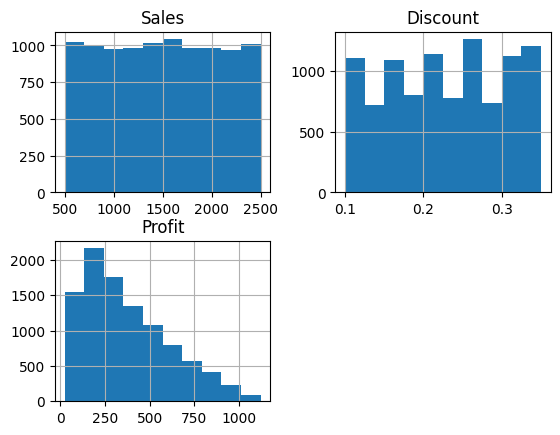

In [7]:
df.hist()

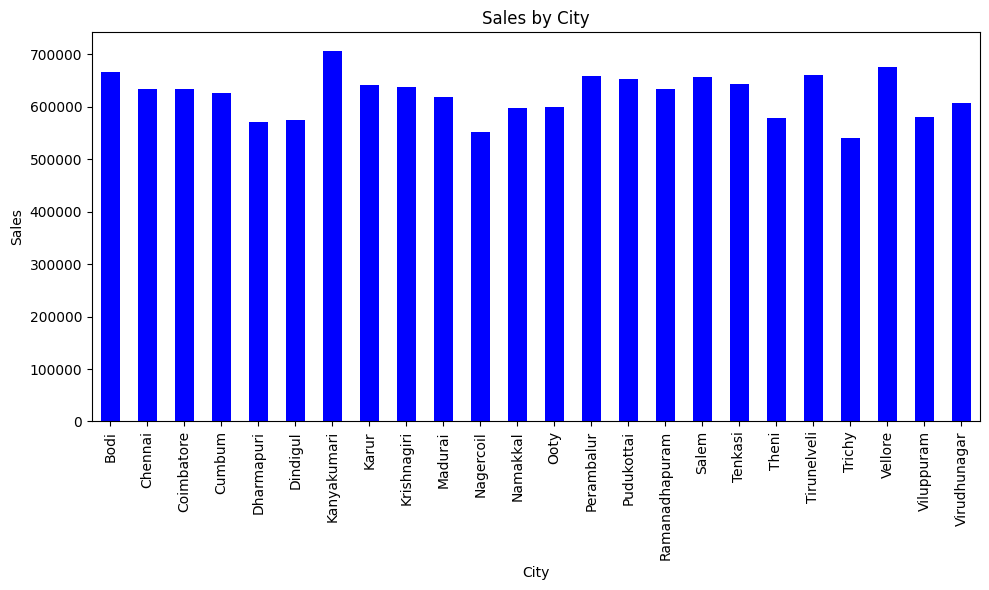

In [16]:
grouped_df=df.groupby('City')[['Sales','Profit']].sum()
plt.figure(figsize=(10,6))
grouped_df['Sales'].plot(kind='bar',color='blue',legend=False)
plt.title('Sales by City')
plt.xlabel("City")
plt.ylabel("Sales")
plt.tight_layout()
plt.show()

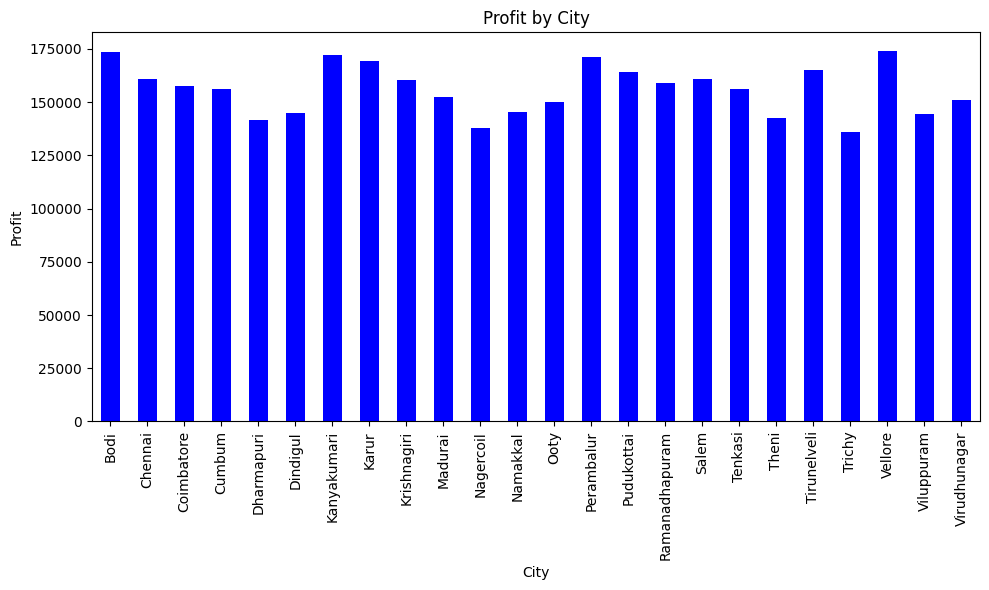

In [17]:
plt.figure(figsize=(10,6))
grouped_df['Profit'].plot(kind='bar',color='blue',legend=False)
plt.title('Profit by City')
plt.xlabel("City")
plt.ylabel("Profit")
plt.tight_layout()
plt.show()



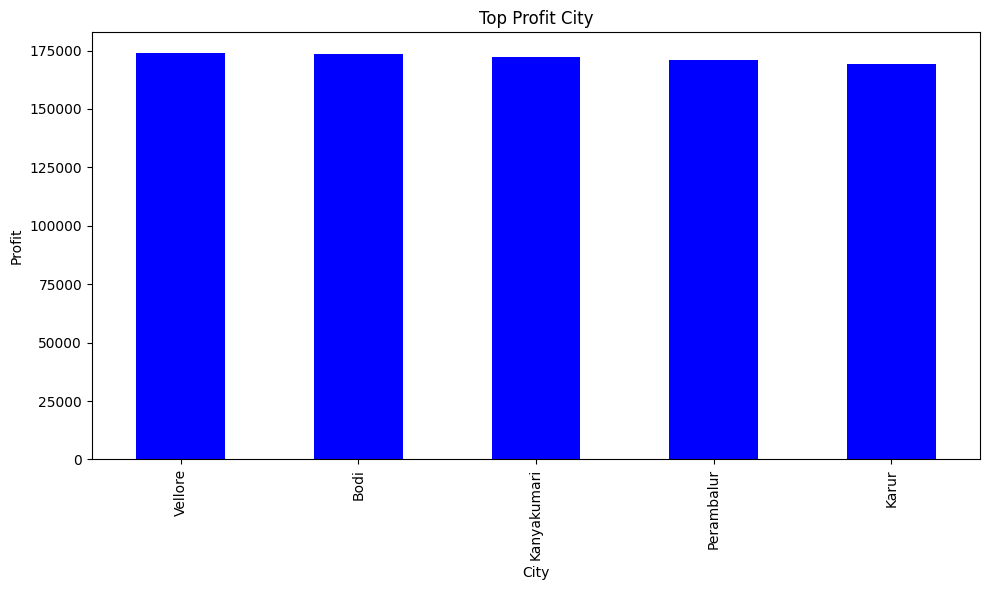

In [24]:
plt.figure(figsize=(10,6))
abc=grouped_df.sort_values(by='Profit',ascending=False)
bcd=abc.head(5)
bcd['Profit'].plot(kind='bar',color='blue',legend=False)
plt.title('Top Profit City')
plt.xlabel("City")
plt.ylabel("Profit")
plt.tight_layout()
plt.show()

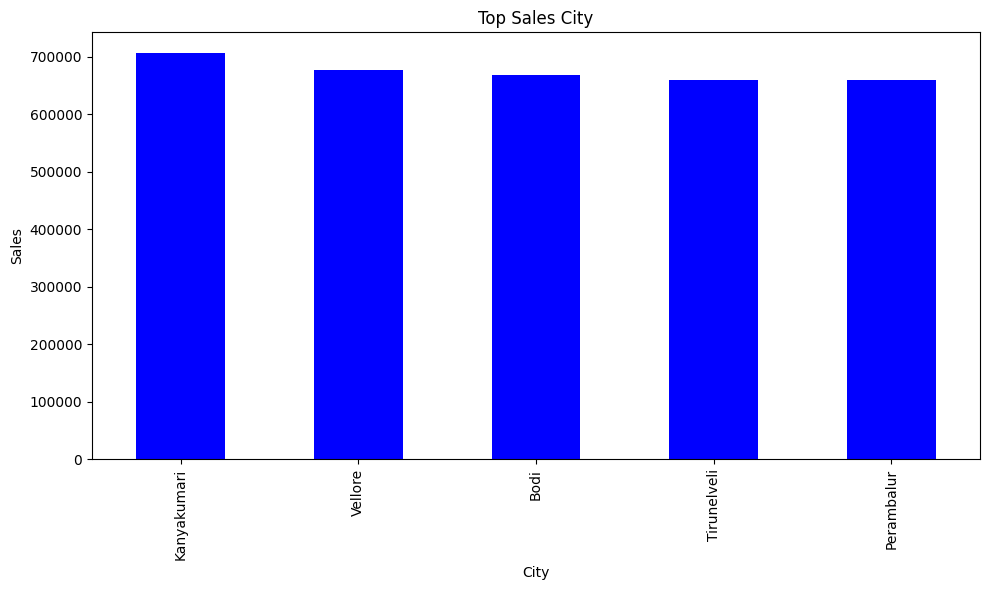

In [25]:
plt.figure(figsize=(10,6))
abc=grouped_df.sort_values(by='Sales',ascending=False)
bcd=abc.head(5)
bcd['Sales'].plot(kind='bar',color='blue',legend=False)
plt.title('Top Sales City')
plt.xlabel("City")
plt.ylabel("Sales")
plt.tight_layout()
plt.show()

In [34]:
df = df.rename(columns={'Sub Category': 'Sub_Category', 'Order Date': 'Order_Date'})


In [35]:
fig = px.scatter(df, x='Sales', y='Profit', title='Sales vs. Profit')
fig.show()

In [36]:
category_sales = df.groupby(['Category', 'Sub_Category'])['Sales'].sum().reset_index()
fig = px.bar(category_sales, x='Category', y='Sales', color='Sub_Category', title='Total Sales by Category')
fig.show()

In [37]:
fig = px.pie(category_sales, values='Sales', names='Sub_Category', title='Total Sales by Sub-Category')
fig.show()

In [38]:
category_profit = df.groupby(['Category', 'Sub_Category'])['Profit'].sum().reset_index()
fig = px.bar(category_profit, x='Category', y='Profit', color='Sub_Category', title='Total Profit by Category')
fig.show()

In [39]:
fig = px.pie(category_profit, values='Profit', names='Sub_Category', title='Total Profit by Sub-Category')
fig.show()

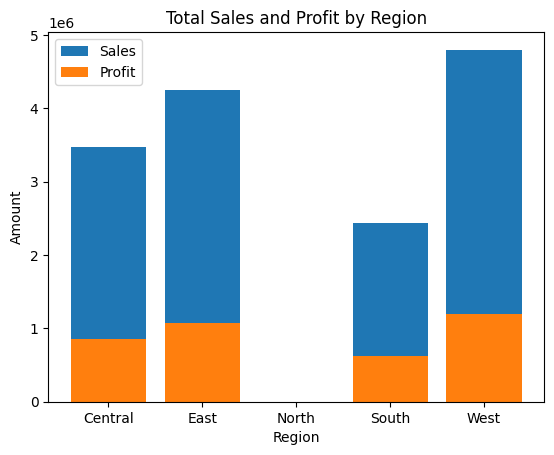

In [40]:
sales_by_region = df.groupby('Region')['Sales'].sum().reset_index()
profit_by_region = df.groupby('Region')['Profit'].sum().reset_index()
sales_profit_by_region = pd.merge(sales_by_region, profit_by_region, on='Region')
fig, ax = plt.subplots()
ax.bar(sales_profit_by_region['Region'], sales_profit_by_region['Sales'], label='Sales')
ax.bar(sales_profit_by_region['Region'], sales_profit_by_region['Profit'], label='Profit')
ax.set_xlabel('Region')
ax.set_ylabel('Amount')
ax.set_title('Total Sales and Profit by Region')
ax.legend()
plt.show()

In [43]:
discount_sales_by_region = df.groupby('Region')['Sales'].apply(lambda x: x[x!=0].sum()).reset_index()
discount_by_region = df.groupby('Region')['Discount'].mean().reset_index()
fig = px.scatter(discount_by_region, x='Discount', y=discount_sales_by_region['Sales'], color='Region',title='Discount and Sales per Region')
fig.show()

In [44]:
discount_sales_by_city = df.groupby('City')['Sales'].apply(lambda x: x[x!=0].sum()).reset_index()
discount_by_city = df.groupby('City')['Discount'].mean().reset_index()

fig = px.scatter(discount_by_city, x='Discount', y=discount_sales_by_city['Sales'], color='City',
                 title='Discount and Sales per City')
fig.show()

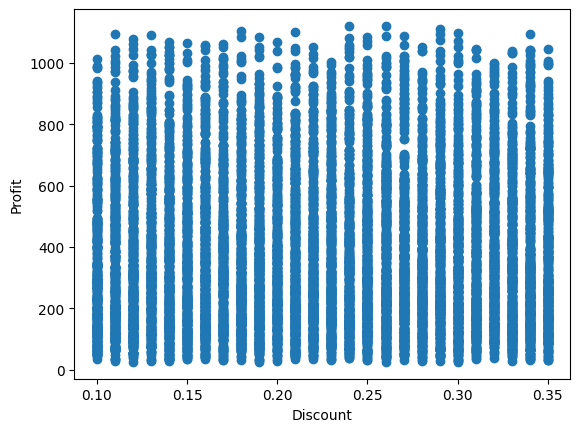

In [45]:
plt.scatter(df["Discount"], df["Profit"])
plt.xlabel("Discount")
plt.ylabel("Profit")
plt.show()